## Example of the Dynamic Mode Decomposition (DMD) of a 1D single wave 
Test Function : 
$$
f(x,t)=f_{1}(x,t)+f_{2}(x,t)=sech(x+3)\exp(i2.3t)+2sech(x)\tanh(x)\exp(i2.8t)
$$

In [1]:
using LinearAlgebra, Plots;gr();default(size=(300,200))

In [2]:
# Define the dataset Y
Nx = 400
x = range(-10,10,length=Nx) #  spatial coordinate (dx = 0.01)

Nt = 200
t = range(0,4π,length=Nt) # time coordinate (dt = 0.01)
dt=t[2]-t[1];

In [3]:
#  Building the two dimensional continous function f(x,t)
f_1(x,t)=sech(x+3)*exp(im*2.3*t)
f_2(x,t)=2*sech(x)*tanh(x)exp(im*2.8*t)
f(x,t)=f_1(x,t)+f_2(x,t)

f (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_f_1_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_f_1_fps15.gif")
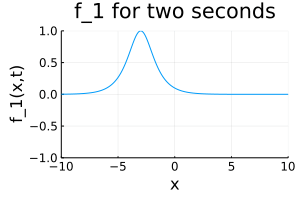

In [4]:
anim=Animation()
anim = @animate for tt in t
    plot( x, real(f_1.(x,tt)),title="f_1 for two seconds",xlim=(-10,10),ylim=(-1.,1.),leg=false,xlabel="x",ylabel="f_1(x,t)")
end
gif(anim, "img/DMD2_f_1_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_f_2_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_f_2_fps15.gif")
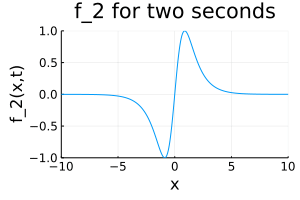

In [5]:
anim=Animation()
anim = @animate for tt in t
    plot( x, real(f_2.(x,tt)),xlim=(-10,10),ylim=(-1,1),title="f_2 for two seconds",leg=false,xlabel="x",ylabel="f_2(x,t)")
end
gif(anim, "img/DMD2_f_2_fps15.gif", fps = 15)

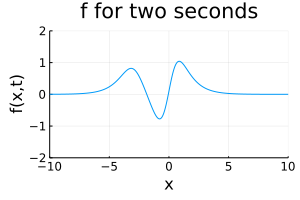

In [6]:
    plot( x, real(f.(x,0)),xlim=(-10,10),ylim=(-2,2),title="f for two seconds",leg=false,xlabel="x",ylabel="f(x,t)")


┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_f_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_f_fps15.gif")
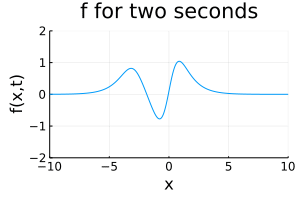

In [7]:
anim=Animation()
anim = @animate for tt in t
    plot( x, real(f.(x,tt)),xlim=(-10,10),ylim=(-2,2),title="f for two seconds",leg=false,xlabel="x",ylabel="f(x,t)")
end
gif(anim, "img/DMD2_f_fps15.gif", fps = 15)

In [8]:
# 2D Contour Plot of the data matrix Y
contour(x,t,f,levels=20)
xlabel!("x")
ylabel!("t")
title!("Contour Plot")

LoadError: InexactError: Float64(0.0016257920898369548 + 0.00023200979522760946im)

In [9]:
# 3D Surface Plot of the dataset
#my_cg = cgrad([:blue, :yellow])
surface(x,t,f, xaxis="x", yaxis="t",zaxis="Y", title="Surface Plot")

LoadError: InexactError: Float64(0.0016257920898369548 + 0.00023200979522760946im)

In [10]:
#  Building the discrete spatio-temporal series Y 
#Build of the spatio-temporal x vs t data matrix Y
Y = Complex.(zeros(Nx,Nt))
j=1
for tt in t
    Y[:,j] = f.(x,tt) 
    j+=1                                           
end
println("\rThe Data Matrix Y = \r")
Y

The Data Matrix Y = 


400×200 Matrix{ComplexF64}:
  0.00164216+0.0im   0.00162579+0.00023201im   …   -0.00132854-0.000965239im
  0.00172657+0.0im   0.00170936+0.000243936im      -0.00139683-0.00101485im
  0.00181532+0.0im   0.00179723+0.000256475im      -0.00146863-0.00106702im
  0.00190864+0.0im   0.00188961+0.000269658im      -0.00154412-0.00112187im
  0.00200675+0.0im   0.00198674+0.000283519im      -0.00162349-0.00117954im
   0.0021099+0.0im   0.00208887+0.000298093im  …   -0.00170694-0.00124017im
  0.00221835+0.0im   0.00219624+0.000313416im      -0.00179469-0.00130392im
  0.00233238+0.0im   0.00230913+0.000329526im      -0.00188694-0.00137094im
  0.00245227+0.0im   0.00242783+0.000346465im      -0.00198393-0.00144141im
  0.00257833+0.0im   0.00255262+0.000364274im      -0.00208591-0.0015155im
  0.00271086+0.0im   0.00268383+0.000382999im  …   -0.00219313-0.0015934im
   0.0028502+0.0im   0.00282179+0.000402686im      -0.00230586-0.00167531im
  0.00299671+0.0im   0.00296684+0.000423385im      -0.0024243

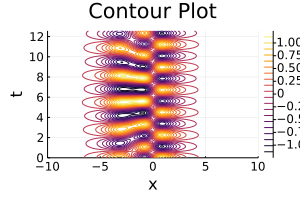

In [11]:
# another way to create the data matrix Y (like the matlab meshgrid function )
X = repeat(reshape(x, :, 1), 1,length(t))
T = repeat(reshape(t,1,:),  length(x),1)
YY = map(f, X, T)
# 2D Contour Plot of the data matrix Y
contour(X[:,1],T[1,:],real(YY)',levels=20)
xlabel!("x")
ylabel!("t")
title!("Contour Plot")

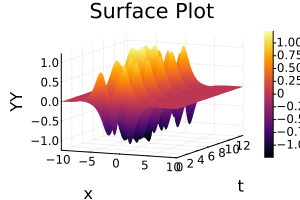

In [12]:
surface(X[:,1],T[1,:],real(YY)',xaxis="x", yaxis="t",zaxis="YY", title="Surface Plot")

In [13]:
# Data decomposition with the singular value decomposition 
# U matrix (spatial Correlations); Σ matrix (weighting of projections), Vt (time dynamics)
Y1 = Y[:,1:end - 1]
Y2 = Y[:,2:end]
U,Σ,V=svd(Y1);

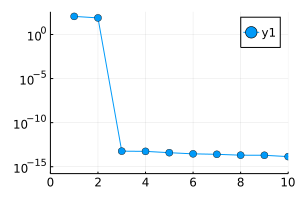

In [14]:
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) The very good decay shows the existence of a low rank subspace =#
plot(Σ, yaxis=:log, xlim=(0,10),shape =:circle)

In [15]:
# SVD and rank-2 truncation
r = 2
Uᵣ = U[:,1:r]
Σᵣ = diagm(Σ[1:r])
Vᵣ = V[:,1:r];

# Build Ã and DMD Modes
Ã = Uᵣ' * Y2 * Vᵣ / Σᵣ
Λ, W = eigen(Ã, sortby=nothing)
Φ = Y2 * Vᵣ / Σᵣ * W

# DMD Spectra
Ω = log.(Λ)/dt

# DMD mode amplitude
y₁=Y1[:,1]
b=Φ\y₁

time_dynamics=Complex.(zeros(r,length(t)))

for i in 1:length(t)
    time_dynamics[:,i] =b.*exp.(Ω* t[i])
end    


## Reduction and Reconstruction with feature extraction (two building blocks with their own dynamics are shown to exist)

In [16]:
y₂=Φ*diagm(Λ)*b
YDMD=Φ*time_dynamics

400×200 Matrix{ComplexF64}:
  0.00164216+2.59122e-20im  …   -0.00132854-0.000965239im
  0.00172657-4.7255e-19im       -0.00139683-0.00101485im
  0.00181532+1.18453e-19im      -0.00146863-0.00106702im
  0.00190864+1.99804e-19im      -0.00154412-0.00112187im
  0.00200675-1.43432e-19im      -0.00162349-0.00117954im
   0.0021099-2.89877e-19im  …   -0.00170694-0.00124017im
  0.00221835+1.20764e-19im      -0.00179469-0.00130392im
  0.00233238+4.9638e-19im       -0.00188694-0.00137094im
  0.00245227+2.46447e-19im      -0.00198393-0.00144141im
  0.00257833+2.33245e-19im      -0.00208591-0.0015155im
  0.00271086+2.41625e-20im  …   -0.00219313-0.0015934im
   0.0028502-7.13497e-19im      -0.00230586-0.00167531im
  0.00299671+6.42515e-19im      -0.00242439-0.00176142im
            ⋮               ⋱  
 0.000323039+6.80295e-20im     -0.000261344-0.000189877im
 0.000307245+1.5323e-20im      -0.000248567-0.000180594im
 0.000292224+6.59008e-20im  …  -0.000236414-0.000171765im
 0.000277937-1.40084e-20im

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_Y_DMD1_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_Y_DMD1_fps15.gif")
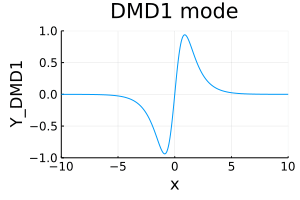

In [17]:
#Animation of the first DMD mode
Y_DMD1=real(Φ[:,1]*time_dynamics[1,:]')
anim=Animation()
j=1
anim = @animate for tt in t
    plot( x, Y_DMD1[:,j],xlim=(-10,10),ylim=(-1.,1.),leg=false,title="DMD1 mode",xlabel="x",ylabel="Y_DMD1")
    j+=1
end
gif(anim, "img/DMD2_Y_DMD1_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_Y_DMD2_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_Y_DMD2_fps15.gif")
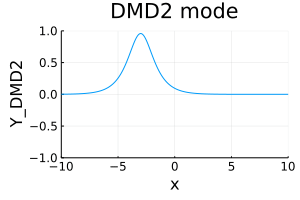

In [18]:
#Animation of the 2nd DMD mode 
Y_DMD2=real(Φ[:,2]*time_dynamics[2,:]')
anim=Animation()
j=1
anim = @animate for tt in t
    plot( x, Y_DMD2[:,j],xlim=(-10,10),ylim=(-1.,1.),leg=false,title="DMD2 mode",xlabel="x",ylabel="Y_DMD2")
    j+=1
end
gif(anim, "img/DMD2_Y_DMD2_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_Yrecons_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_Yrecons_fps15.gif")
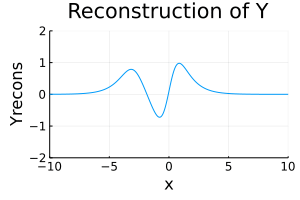

In [19]:
#Animation of Yrecons = Y_DMD1+Y_DMD2
Yrecons=Y_DMD1+Y_DMD2
anim=Animation()
j=1
anim = @animate for tt in t
    plot( x, Yrecons[:,j],xlim=(-10,10),ylim=(-2.,2.),leg=false,title="Reconstruction of Y",xlabel="x",ylabel="Yrecons")
    j+=1
end
gif(anim, "img/DMD2_Yrecons_fps15.gif", fps = 15)